<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(0)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.656265,60.778016,63.143605,-1.250803,159.327083,160.401479,-1.074396
1,0.0,1.0,40.554300,98.537631,84.561515,-1.119483,232.533963,233.407451,-0.873488
2,0.0,2.0,40.853121,66.697786,61.806026,-0.350376,179.006556,179.267857,-0.261301
3,0.0,3.0,95.760576,87.496756,67.226014,0.974627,261.457973,260.702568,0.755405
4,0.0,4.0,83.798490,67.139156,70.711096,1.971120,233.619862,231.825367,1.794494
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,69.332633,37.635862,21.290418,0.292302,138.551215,138.371087,0.180128
119996,999.0,116.0,73.017739,26.387378,47.839267,-0.253495,156.990888,157.347201,-0.356312
119997,999.0,117.0,99.976967,41.807065,55.330954,0.608211,207.723197,207.421480,0.301717
119998,999.0,118.0,48.677687,40.131587,96.130772,-2.142562,192.797485,194.894380,-2.096895


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    26.656265  60.778016  63.143605  ...  159.327083  160.401479 -1.074396
      1.0    40.554300  98.537631  84.561515  ...  232.533963  233.407451 -0.873488
      2.0    40.853121  66.697786  61.806026  ...  179.006556  179.267857 -0.261301
      3.0    95.760576  87.496756  67.226014  ...  261.457973  260.702568  0.755405
      4.0    83.798490  67.139156  70.711096  ...  233.619862  231.825367  1.794494
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  69.332633  37.635862  21.290418  ...  138.551215  138.371087  0.180128
      116.0  73.017739  26.387378  47.839267  ...  156.990888  157.347201 -0.356312
      117.0  99.976967  41.807065  55.330954  ...  207.723197  207.421480  0.301717
      118.0  48.677687  40.131587  96.130772  ...  192.797485  194.894380 -2.096895
      119.0  72.867905  81.227729  85.730608  ...  249.558365  250.025758 -0.467393

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    26.656265  60.778016  63.143605  ...  159.327083  160.401479 -1.074396
      1.0    40.554300  98.537631  84.561515  ...  232.533963  233.407451 -0.873488
      2.0    40.853121  66.697786  61.806026  ...  179.006556  179.267857 -0.261301
      3.0    95.760576  87.496756  67.226014  ...  261.457973  260.702568  0.755405
      4.0    83.798490  67.139156  70.711096  ...  233.619862  231.825367  1.794494
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  69.332633  37.635862  21.290418  ...  138.551215  138.371087  0.180128
      116.0  73.017739  26.387378  47.839267  ...  156.990888  157.347201 -0.356312
      117.0  99.976967  41.807065  55.330954  ...  207.723197  207.421480  0.301717
      118.0  48.677687  40.131587  96.130772  ...  192.797485  194.894380 -2.096895
      119.0  72.867905  81.227729  85.730608  ...  249.558365  250.025758 -0.467393

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,26.656265,60.778016,63.143605,-1.250803,159.327083,160.401479,-1.074396
1,0.0,1.0,40.554300,98.537631,84.561515,-1.119483,232.533963,233.407451,-0.873488
2,0.0,2.0,40.853121,66.697786,61.806026,-0.350376,179.006556,179.267857,-0.261301
3,0.0,3.0,95.760576,87.496756,67.226014,0.974627,261.457973,260.702568,0.755405
4,0.0,4.0,83.798490,67.139156,70.711096,1.971120,233.619862,231.825367,1.794494
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,69.332633,37.635862,21.290418,0.292302,138.551215,138.371087,0.180128
119996,999.0,116.0,73.017739,26.387378,47.839267,-0.253495,156.990888,157.347201,-0.356312
119997,999.0,117.0,99.976967,41.807065,55.330954,0.608211,207.723197,207.421480,0.301717
119998,999.0,118.0,48.677687,40.131587,96.130772,-2.142562,192.797485,194.894380,-2.096895


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    26.656265  60.778016  63.143605  ...  159.327083  160.401479 -1.074396
      1.0    40.554300  98.537631  84.561515  ...  232.533963  233.407451 -0.873488
      2.0    40.853121  66.697786  61.806026  ...  179.006556  179.267857 -0.261301
      3.0    95.760576  87.496756  67.226014  ...  261.457973  260.702568  0.755405
      4.0    83.798490  67.139156  70.711096  ...  233.619862  231.825367  1.794494
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  69.332633  37.635862  21.290418  ...  138.551215  138.371087  0.180128
      116.0  73.017739  26.387378  47.839267  ...  156.990888  157.347201 -0.356312
      117.0  99.976967  41.807065  55.330954  ...  207.723197  207.421480  0.301717
      118.0  48.677687  40.131587  96.130772  ...  192.797485  194.894380 -2.096895
      119.0  72.867905  81.227729  85.730608  ...  249.558365  250.025758 -0.467393

[120000 rows x 7 columns]

In [ ]:
# แสดงค่าของ Replicate
new_table = table.loc[0.0]
new_table

,x1,x2,x3,e,Y,y_hat,e_hat
index,,,,,,,
0.0,26.656265,60.778016,63.143605,-1.250803,159.327083,160.401479,-1.074396
1.0,40.554300,98.537631,84.561515,-1.119483,232.533963,233.407451,-0.873488
2.0,40.853121,66.697786,61.806026,-0.350376,179.006556,179.267857,-0.261301
3.0,95.760576,87.496756,67.226014,0.974627,261.457973,260.702568,0.755405
4.0,83.798490,67.139156,70.711096,1.971120,233.619862,231.825367,1.794494
5.0,65.721175,63.703885,20.182580,-1.398388,158.209252,159.834053,-1.624801
6.0,43.818115,51.943191,79.273140,-0.474492,184.559954,184.945688,-0.385734
7.0,38.135676,73.722823,50.991865,1.056394,173.906758,172.760329,1.146429
8.0,80.982878,94.689173,94.447986,0.940756,281.060792,280.129983,0.930809


In [ ]:
# show index
new_table.reset_index(inplace=True)
new_table

,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,26.656265,60.778016,63.143605,-1.250803,159.327083,160.401479,-1.074396
1,1.0,40.554300,98.537631,84.561515,-1.119483,232.533963,233.407451,-0.873488
2,2.0,40.853121,66.697786,61.806026,-0.350376,179.006556,179.267857,-0.261301
3,3.0,95.760576,87.496756,67.226014,0.974627,261.457973,260.702568,0.755405
4,4.0,83.798490,67.139156,70.711096,1.971120,233.619862,231.825367,1.794494
5,5.0,65.721175,63.703885,20.182580,-1.398388,158.209252,159.834053,-1.624801
6,6.0,43.818115,51.943191,79.273140,-0.474492,184.559954,184.945688,-0.385734
7,7.0,38.135676,73.722823,50.991865,1.056394,173.906758,172.760329,1.146429
8,8.0,80.982878,94.689173,94.447986,0.940756,281.060792,280.129983,0.930809
9,9.0,68.502805,86.044650,64.285805,-0.140615,228.692644,228.877895,-0.185251


In [ ]:
from scipy.stats.morestats import yeojohnson_llf
# แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

#Set number of clusters
x = new_table[["x1", "x2", "x3"]]
k_means = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

#Generate cluster predictions and store in y_kmeans
y_kmeans = k_means.predict(x)

# kmean_clusters.astype(float)
kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})
kmean_clusters

,clusters
0,1
1,1
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [ ]:
# เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกัน
data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
data_clusters

,index,x1,x2,x3,e,Y,y_hat,e_hat,clusters
0,0.0,26.656265,60.778016,63.143605,-1.250803,159.327083,160.401479,-1.074396,1
1,1.0,40.554300,98.537631,84.561515,-1.119483,232.533963,233.407451,-0.873488,1
2,2.0,40.853121,66.697786,61.806026,-0.350376,179.006556,179.267857,-0.261301,1
3,3.0,95.760576,87.496756,67.226014,0.974627,261.457973,260.702568,0.755405,1
4,4.0,83.798490,67.139156,70.711096,1.971120,233.619862,231.825367,1.794494,1
5,5.0,65.721175,63.703885,20.182580,-1.398388,158.209252,159.834053,-1.624801,0
6,6.0,43.818115,51.943191,79.273140,-0.474492,184.559954,184.945688,-0.385734,1
7,7.0,38.135676,73.722823,50.991865,1.056394,173.906758,172.760329,1.146429,0
8,8.0,80.982878,94.689173,94.447986,0.940756,281.060792,280.129983,0.930809,1
9,9.0,68.502805,86.044650,64.285805,-0.140615,228.692644,228.877895,-0.185251,1


In [ ]:
data_clusters.to_csv('rep0_multi_delta_(0)_n120_01.csv')
files.download('rep0_multi_delta_(0)_n120_01.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data_sort_clusters = data_clusters.sort_values('clusters')
data_sort_clusters

,index,x1,x2,x3,e,Y,y_hat,e_hat,clusters
119,119.0,99.796186,98.599018,40.424342,-0.624722,248.194824,249.126525,-0.931702,0
31,31.0,43.441021,67.187317,45.984250,0.781271,167.393859,166.592014,0.801844,0
101,101.0,51.117207,57.303024,47.293734,-0.694694,165.019272,165.766912,-0.747640,0
100,100.0,77.769681,56.326255,32.173178,-0.069792,176.199322,176.557834,-0.358513,0
34,34.0,38.147316,40.454012,28.307066,-0.941253,115.967140,116.976667,-1.009527,0
99,99.0,49.609264,82.529543,44.954253,2.195611,189.288670,187.079728,2.208942,0
64,64.0,96.312115,60.336884,50.195190,-0.186814,216.657375,217.191504,-0.534129,0
73,73.0,86.832378,46.187742,51.297757,-1.223358,193.094519,194.631879,-1.537360,0
38,38.0,57.608148,31.745545,64.001106,0.823265,164.178063,163.462076,0.715987,0
63,63.0,63.291243,42.118786,29.928627,-1.643838,143.694818,145.570734,-1.875916,0


In [ ]:
data_sort_clusters.to_csv('rep0_multi_delta_(0)_n120_01.csv')
files.download('rep0_multi_delta_(0)_n120_01.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

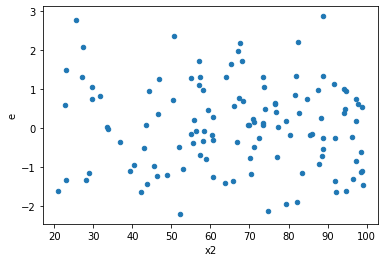

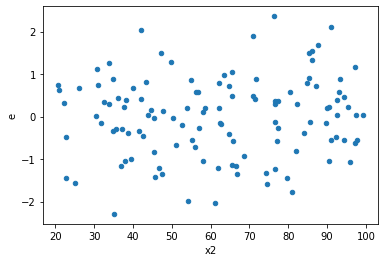

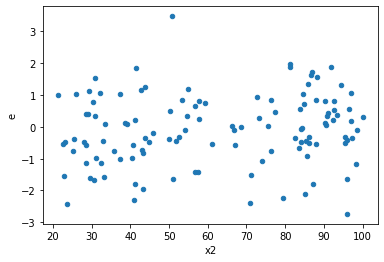

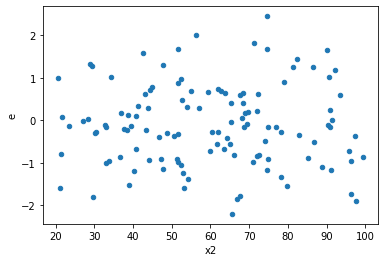

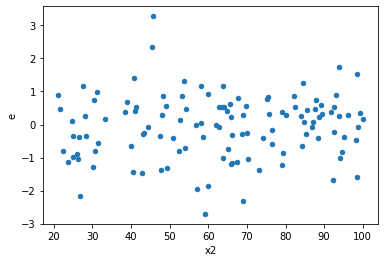

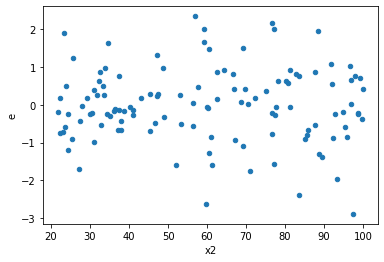

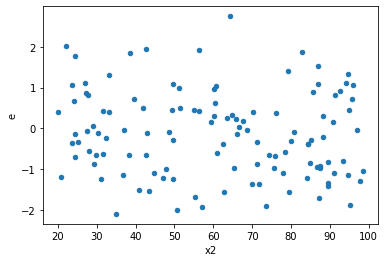

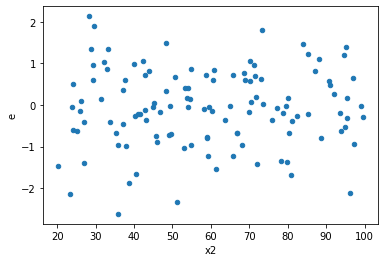

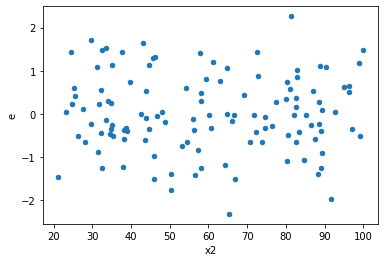

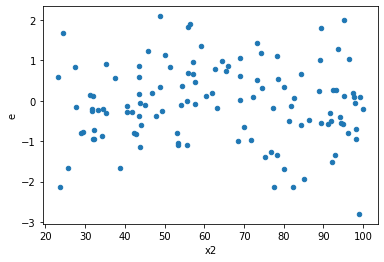

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,52.0,62.0,58.56203103064235,74.15232388944135,1.1261929044354297,1.1960052240232475,1.0619896638603092,0.8156465253493392,0.5921767373253304,0.4078232626746696,Reject001=1 : Homoscedasticity
1.0,65.0,49.0,54.16588753537655,45.21036857956445,0.8333213466981008,0.9226605832564174,1.1072086259548117,0.714789093289868,0.642605453355066,0.357394546644934,Reject001=1 : Homoscedasticity
4.0,60.0,54.0,45.445353704830474,58.38488488504392,0.7574225617471746,1.0812015719452577,1.4274747367588445,0.18565957038705427,0.9071702148064729,0.09282978519352714,Reject001=1 : Homoscedasticity
6.0,60.0,54.0,61.301016784146086,60.49142803075629,1.0216836130691014,1.1202116301991905,1.0964369163503704,0.7334546755989466,0.6332726622005267,0.3667273377994733,Reject001=1 : Homoscedasticity
8.0,53.0,61.0,39.05311071033998,49.08552994655949,0.7368511454781128,0.8046808187960572,1.0920534272548799,0.7363736673284431,0.6318131663357784,0.36818683366422156,Reject001=1 : Homoscedasticity
9.0,60.0,54.0,54.56289935418697,50.054126862319194,0.9093816559031161,0.9269282752281333,1.0192951102665375,0.9465422755816477,0.5267288622091761,0.47327113779082386,Reject001=1 : Homoscedasticity
10.0,59.0,55.0,51.148555599976156,60.23977692096917,0.8669246711860366,1.0952686712903485,1.2633954341060745,0.38272322052630714,0.8086383897368464,0.19136161026315357,Reject001=1 : Homoscedasticity
12.0,54.0,60.0,37.35327089604789,59.8619949328027,0.6917272388157016,0.9976999155467117,1.4423313982182664,0.16761894541095468,0.9161905272945227,0.08380947270547734,Reject001=1 : Homoscedasticity
15.0,55.0,59.0,52.37883747615984,65.3301509890697,0.9523424995665425,1.1072906947299948,1.1627021740959547,0.5689789833769408,0.7155105083115296,0.2844894916884704,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,52.0,62.0,58.56203103064235,74.15232388944135,1.1261929044354297,1.1960052240232475,1.0619896638603092,0.8156465253493392,Reject001=1 : Homoscedasticity
1.0,65.0,49.0,54.16588753537655,45.21036857956445,0.8333213466981008,0.9226605832564174,1.1072086259548117,0.714789093289868,Reject001=1 : Homoscedasticity
2.0,58.0,56.0,72.1317737909244,67.37781093616728,1.2436512722573172,1.2031751952887013,0.9674538370429607,0.89981139719303,Reject001=1 : Homoscedasticity
3.0,55.0,59.0,54.33334484614302,52.034492826848684,0.9878789972026004,0.8819405563872659,0.8927617237381067,0.6726097154851393,Reject001=1 : Homoscedasticity
4.0,60.0,54.0,45.445353704830474,58.38488488504392,0.7574225617471746,1.0812015719452577,1.4274747367588445,0.18565957038705427,Reject001=1 : Homoscedasticity
5.0,56.0,58.0,70.62120099575968,39.92862894438245,1.26109287492428,0.6884246369721112,0.5458952712054982,0.02430180468021448,Reject001=1 : Homoscedasticity
6.0,60.0,54.0,61.301016784146086,60.49142803075629,1.0216836130691014,1.1202116301991905,1.0964369163503704,0.7334546755989466,Reject001=1 : Homoscedasticity
7.0,55.0,59.0,45.56096342120789,43.62916646372151,0.8283811531128706,0.739477397690195,0.8926777183563446,0.6723523577283393,Reject001=1 : Homoscedasticity
8.0,53.0,61.0,39.05311071033998,49.08552994655949,0.7368511454781128,0.8046808187960572,1.0920534272548799,0.7363736673284431,Reject001=1 : Homoscedasticity


In [15]:
result['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      988
Reject001=0 : Heteroscedasticity     12
Name: Result_test, dtype: int64